# Q1 Sobel

## a)

In [591]:
import cv2 as cv
import numpy as np 
import matplotlib.pylab as plt

In [592]:
# generate random matrix with size n*n
def generateRandomMatrix(n):
  random = np.random.randint(0, 256, size=(n, n))
  return random 

In [593]:
def show_img(image , title ):
    plt.imshow(image , cmap = 'gray')
    plt.axis("off")
    plt.title(f'{title}')

In [594]:
# write convolution function
#with zero padding 
def convolve(matrix, kernel):
    reversed_kernel = np.flipud(np.fliplr(kernel))
    size = reversed_kernel.shape[0]
    h = matrix.shape[0]
    w = matrix.shape[1]
    
    #zero_padding
    matrix_padded = np.pad(matrix, (size//2, size//2), 'edge')
    m ,n = matrix_padded.shape
    result = np.zeros((w,h))
    for i in range( w): 
        for j in range(h):
            if(i+size <= m and j+size <= n): 
                window = matrix_padded[i:i+size, j:j+size]
                sum_product = np.sum(window * reversed_kernel) 
                result[i,j] = sum_product
    
    return result


In [595]:
# generate horizontal and vertical kernels

ykernel = np.array([[-1, -2 , -1],
                   [0, 0 , 0], 
                   [1 , 2 , 1]
                   ])


xkernel = np.array([[-1, 0 , +1],
                   [-2 , 0 , 2], 
                   [-1 , 0 , +1]
                   ])

[[  5 137 110  77 148 240  33 235  19  73]
 [  6 248 239 130 245 215 200  98 128  26]
 [ 14 134  66  32  16 182  97  39 157 174]
 [ 39  79 162 211 209 255  27 154  11 225]
 [210  31  46 242  94 158 229  49  65 250]
 [ 60 228 254 102 177 149 162  23 143 151]
 [105 159 168  65 223 154  80  63  17 196]
 [ 38  90 116 168  37 152 141  47 201  43]
 [169 171 253 186  41 105 117 140 151 156]
 [ 14 248 219 213  54  51  64  39 114 207]]


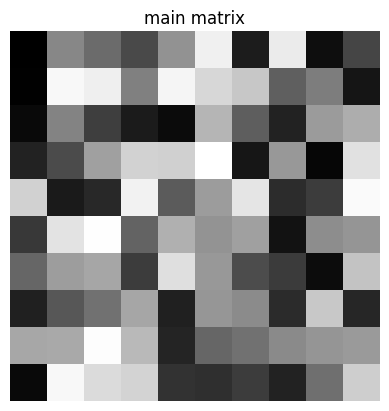

In [596]:
# convolve the initial matrix with kernels
matrix = generateRandomMatrix(10)
show_img(matrix , "main matrix")
print(matrix)

[[-638. -548.  298. -120. -574.  390.  132.  114.  558.  -60.]
 [-736. -623.  398.    0. -483.  124.  382.   98.  171.  133.]
 [-522. -460.  190.   47. -429.   65.  504.  -32. -269. -146.]
 [ -21. -134. -373.  -92. -154.  148.  454.  136. -478. -630.]
 [ 150.   11. -428.  -66.   77.  -73.  445.  363. -601. -592.]
 [-211. -287.  135.   51.  -99.   38.  452.  265. -590. -380.]
 [-328. -398.  236.   46. -209.  197.  413.   85. -390. -208.]
 [-160. -303.  -77.  315.   24. -141.  266.  -91. -141.  132.]
 [-290. -451.  -73.  668.  340. -266.   47. -178. -196.   55.]
 [-704. -699.   90.  707.  567. -106.    1. -184. -520. -284.]]


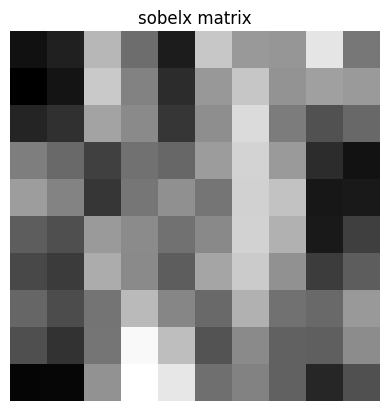

In [597]:
sobel_vertical = convolve(matrix  , xkernel)
show_img(sobel_vertical , "sobelx matrix")
print(sobel_vertical)

[[-114. -352. -422. -332. -222. -214. -172.   -2.  -34.   32.]
 [ -24.   41.  136.  266.  367.  184.  126.  190. -181. -441.]
 [  70.  382.  242.  -49.  -49.  129.  250.  178.  -21. -480.]
 [-485.   30.  -67. -478. -342. -162. -250.  -60.   98. -136.]
 [-212. -411. -224.  158.  279.  109.  -33.   -5.  -59.   90.]
 [ 187. -273. -195.  103.  -77.   28.  288.  169.  136.  210.]
 [ 204.  436.  348.  146.  211.  155.   15.  -85.  -32.  266.]
 [-204. -173. -303. -145.  292.  243. -102. -325. -305.  -14.]
 [ -86. -395. -409. -210.   22.  262.  263.  180.   18. -405.]
 [ 388.   35.  -36.  -33.    1.  148.  261.  292.  124. -116.]]


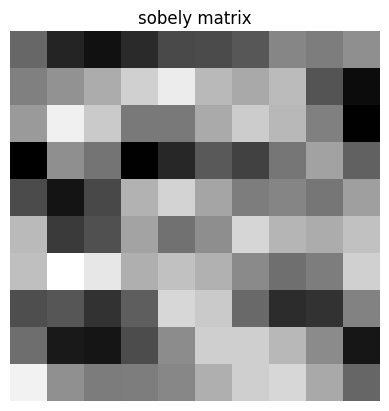

In [598]:
sobel_horizental = convolve(matrix  , ykernel)
show_img(sobel_horizental , 'sobely matrix')
print(sobel_horizental)

In [599]:
# generate magnitude and direction matrixes
direction = np.arctan2(sobel_vertical, sobel_horizental)*180 /np.pi

print('direction in degree')
print(direction)



direction in degree
[[-100.13088797 -122.71408392  144.77174735 -160.12782418 -111.14445589
   118.75436695  142.49585764   91.00508601   93.48682977  -61.92751306]
 [ -91.86767884  -86.23476025   71.13426396    0.          -52.77118195
    33.97654404   71.74522599   27.28420729  136.62728332  163.21735585]
 [ -82.36222305  -50.29258004   38.13630809  136.19348942  -96.51603502
    26.74243692   63.61712875  -10.19150185  -94.46385118 -163.08198715]
 [-177.52070044  -77.38067771 -100.18314214 -169.10558161 -155.75832427
   137.58579434  118.83985331  113.80594352  -78.41372347 -102.18168169]
 [ 144.7187922   178.4669023  -117.62596287  -22.67134362   15.42874175
   -33.81120007   94.24113743   90.78914816  -95.60674524  -81.35568386]
 [ -48.45084319 -133.56790382  145.30484647   26.34211153 -127.87498365
    53.61564818   57.49601104   57.47288212  -77.01956884  -61.07357416]
 [ -58.12040315  -42.39120525   34.14358665   17.48799738  -44.72716502
    51.80425956   87.91995377  135.   

In [600]:
magnitude = np.hypot(sobel_horizental , sobel_vertical)
print('magnitude')
print(magnitude)

magnitude
[[648.10492978 651.31252099 516.61204012 353.02124582 615.43480565
  444.85503257 216.81328373 114.01754251 559.03488263  68.        ]
 [736.39120038 624.34765956 420.5948169  266.         606.61190229
  221.88285197 402.24370722 213.78493867 249.00200802 460.61914854]
 [526.67257381 597.93310663 307.67515337  67.89698079 431.78930047
  144.45068363 562.5975471  180.8535319  269.81845749 501.71306541]
 [485.45442629 137.31715115 378.96965578 486.77304773 375.07332616
  219.42652529 518.28177664 148.64723341 487.94261958 644.51221866]
 [259.69982672 411.1471756  483.07349337 171.23083834 289.43047524
  131.18688959 446.22191788 363.03443363 603.88906266 598.8021376 ]
 [281.93970987 396.10352182 237.17082451 114.93476411 125.41929676
   47.20169488 535.95522201 314.30240215 605.47171693 434.16586692]
 [386.26415832 590.33888573 420.47592083 153.07514495 296.98821525
  250.66710993 413.27230732 120.2081528  391.31061831 337.66847647]
 [259.26048677 348.90973045 312.63077264 346.

## b)

In [601]:
# load matrix and convert it to gray scale
image = cv.cvtColor(cv.imread('images/afshin.jpg') , cv.COLOR_BGR2GRAY)

In [602]:
# define gaussian kernel 

sigma = 1.0
dst = np.linspace(-1, 1 ,7)
x, y = np.meshgrid(dst, dst)
d = np.hypot(x,y)
gaussian_kernel= np.exp(-( (d)**2 / ( 2 * (sigma**2) ) ) )
gaussian_kernel= 1/np.sum(gaussian_kernel) *gaussian_kernel


In [603]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
guassian_img = cv.filter2D(image,-1 , gaussian_kernel)


In [604]:
#image without filter 
#link from https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.
def sobel(image , title):
    grad_x = convolve(image, xkernel)
    grad_y = convolve(image , ykernel)
    #depth of image into cv_8u
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    show_img(grad , title)
    
    

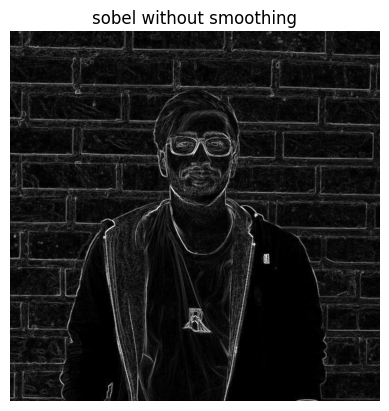

In [605]:
sobel(image=image , title = "sobel without smoothing")


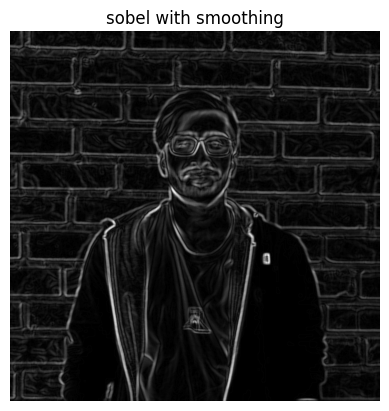

In [606]:
sobel(guassian_img , title ="sobel with smoothing")

## c)

In [607]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
def opencvsobel(image, title):
    sobely = cv.Sobel(src=image, ddepth= -1 , dx=0, dy=1, ksize=3 , borderType= cv.BORDER_CONSTANT)
    sobelx = cv.Sobel(src=image, ddepth= -1 , dx=1, dy=0, ksize=3)
    sobel = cv.addWeighted(sobelx, 0.5,sobely, 0.5, 0)
    show_img(sobel , title)

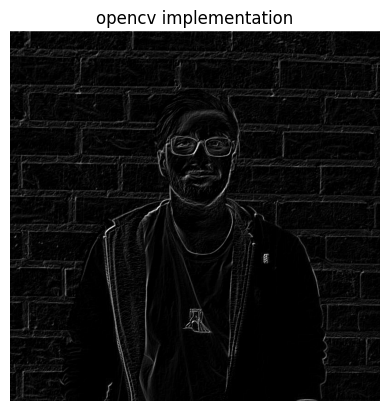

In [608]:
opencvsobel(image=image , title = 'opencv implementation')

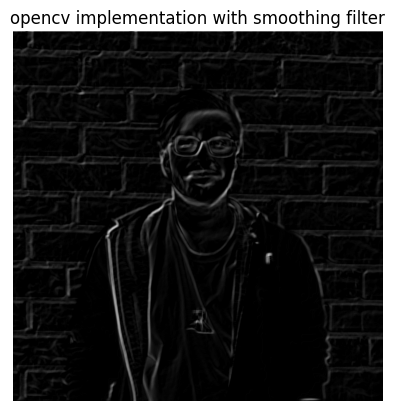

In [609]:
opencvsobel(guassian_img , title = 'opencv implementation with smoothing filter')